# <font color='#00878A'>Ciência dos Dados</font>
## Projeto 3
Amanda Carmo    | 
Lucio Hallage    |
Nicole Costa    |
Vitor Miada

# <font color='#00878A'>Objetivo do projeto:</font>
<p>
Conduzir análise de dados utilizando técnicas como: regressão linear, decision tree e random forest regression.
<p>
Em nosso projeto iremos analizar a base de dados do jogo League of Legends da Riot Games, explicado mais a seguir, para fazer a previsão de vitórias de uma partida considerando-se os times e seus respectivos jogadores, além dos champions usados, que também serão definidos a seguir.



- ## O que é League of Legends: ##

League of Legends é um jogo online MOBA (Multiplayer Online Battle Arena) competitivo, no qual dez jogadores, divididos em dois times,  batalham com diferentes personagens que exercem inúmeras funções durante a partida. O jogo, que permanece em constante atualização, oferece competitividade e entretenimento para todos os jogadores de diferentes níveis de habilidade, havendo servidores que cobrem praticamente todas as regiões do mundo, havendo, pois, competições  internacionais anuais. O jogo, também conhecido como LOL é um dos digital games mais jogados no planeta.


- ## O funcionamento do jogo :


No League of Legends, o objetivo do jogo é destruir o néxus (o núcleo) da base inimiga. Para isso, serão 10 jogadores divididos em 2 times, o azul e o vermelho, que se enfrentarão num campo de batalha. Para cada jogador, existe uma função principal, na qual pode ser dividida em 5 funções: o Topo (Top-lane), o Caçador (Jungler), o Meio (Mid-lane), o Atirador (ADC) e o Suporte (SUP). Para saber qual posição cada competidor exercerá, serão escolhidos dentre dos 150 campeões (personagens), apenas 5 para cada time, no qual cada jogador selecionará um para jogar. Cada personagem escolhido, tem seu estilo, e portanto sua função dentre as 5 antes mencionadas.


- ## Data-Set ##

O dataset é constituido de apenas partidas profissionais entre 2015 a 2018 de todos os servidores. O documento, mostra principalmente, quais campeões cada time selecionou, por exemplo, o "redTopChamp", significa qual campeão o jogador do time vermelho jogou; quais foram os jogadores que jogaram a partida, por exemplo, o "blueJungle", que significa quem jogou como Caçador no time azul; qual time jogou e se ele venceu (1) ou perdeu (0), por exemplo "blueTeamTag", representa a sigla do time azul, e "bResult" igual a 0, significa que ele perdeu. Outros dados como ano, liga, não são relevantes, pois como o objetivo do projeto é estimar quem vai ganhar, quando ocorreu e onde ocorreu não são necessários.

## Preparando o ambiente no jupyter:

In [17]:
%matplotlib inline
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings

# <font color='#00878A'>Análise Explorartória</font>

In [18]:
# lendo a base de dados
dados = pd.read_excel('matchinfo-treinamento.xlsx')
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [19]:
dados.head(4)

,League,Year,Season,Type,blueTeamTag,bResult,rResult,redTeamTag,gamelength,blueTop,...,redTopChamp,redJungle,redJungleChamp,redMiddle,redMiddleChamp,redADC,redADCChamp,redSupport,redSupportChamp,Address
0,NALCS,2016,Spring,Season,TSM,0,1,REN,30,Hauntzer,...,Graves,Crumbz,Gragas,Ninja,Lissandra,Freeze,Caitlyn,Hakuho,Bard,http://matchhistory.na.leagueoflegends.com/en/...
1,TCL,2015,Spring,Season,BJK,1,0,NR1,43,Thaldrin,...,Maokai,Decagon Moon,RekSai,LEYL U NEHAR,Ahri,Revanche,Sivir,Swanepoel,Janna,http://matchhistory.tr.leagueoflegends.com/tr/...
2,NALCS,2017,Spring,Season,NV,1,0,C9,38,Seraph,...,Nautilus,Contractz,LeeSin,Jensen,Cassiopeia,Sneaky,Ezreal,Smoothie,Malzahar,http://matchhistory.na.leagueoflegends.com/en/...
3,IEM,2016,Spring,International,OG,0,1,TSM,33,Soaz,...,Fiora,Svenskeren,LeeSin,Bjergsen,TwistedFate,Doublelift,Ezreal,Yellowstar,Alistar,http://matchhistory.euw.leagueoflegends.com/en...


In [20]:
dados.columns

Index(['League', 'Year', 'Season', 'Type', 'blueTeamTag', 'bResult', 'rResult',
       'redTeamTag', 'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp', 'Address'],
      dtype='object')

Apenas por observar nossa base de dados, fica evidente que nossas colunas são majoritariamente qualitativas categóricas. 

In [21]:
porcent_vitorias = dados.bResult.value_counts(True)*100

Text(0.5, 1.0, 'Vitórias por Time em %')

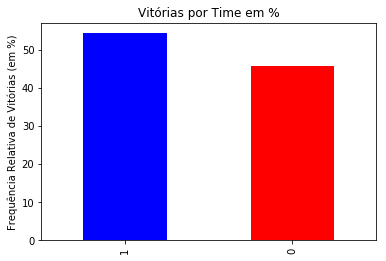

In [22]:
porcent_vitorias.plot(kind='bar', color=('blue', 'red'), legend=False)
plt.ylabel("Frequência Relativa de Vitórias (em %)")
plt.title('Vitórias por Time em %')

Com o gráfico acima podemos concluir que os níveis das partidas foram relativamente equivalente entre os times 'Red' e 'Blue', tendo o time azul ganho um pouco mais de 50% e o vermelho um pouco menos. 

In [23]:
# Abaixo vamos concatenar as colunas dos times vermelho e azul para determinarmos os top 10 times vencedores gerais

columnsb=['bResult', 'blueTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle','blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC','blueADCChamp', 'blueSupport', 'blueSupportChamp']
columnsr=['rResult', 'redTeamTag', 'redTop','redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle','redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport','redSupportChamp']
columns=['Result', 'TeamTag', 'Top','TopChamp', 'Jungle', 'JungleChamp', 'Middle','MiddleChamp', 'ADC', 'ADCChamp', 'Support','SupportChamp']

In [24]:
dados_b = dados[columnsb]
dados_b.columns = columns
dados_r = dados[columnsr]
dados_r.columns = columns

In [25]:
dados_concat = pd.concat([dados_b, dados_r]).dropna()
dados_concat.head()

,Result,TeamTag,Top,TopChamp,Jungle,JungleChamp,Middle,MiddleChamp,ADC,ADCChamp,Support,SupportChamp
0,0,TSM,Hauntzer,Trundle,Svenskeren,Elise,Bjergsen,Lulu,Doublelift,Jhin,Yellowstar,Braum
1,1,BJK,Thaldrin,Gnar,Theokoles,JarvanIV,Energy,Xerath,Nardeus,Graves,Dumbledoge,Annie
2,1,NV,Seraph,Maokai,LirA,Nidalee,Ninja,Jayce,Apollo,Ziggs,Hakuho,Lulu
3,0,OG,Soaz,Trundle,Amazing,Elise,PowerOfEvil,Talon,Zven,Lucian,Mithy,Braum
4,1,SIN,Dhokla,Rumble,Juves,RekSai,ry0ma,Zed,FBI,Kalista,Rogue,Braum


In [26]:
win_concat = dados_concat.TeamTag[dados_concat.Result == 1].value_counts(True)*100
top10_concat = win_concat.head(10)

Text(0.5, 1.0, 'Top 10 Equipes Vencedoras')

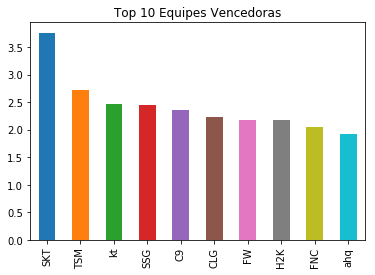

In [27]:
#GRÁFICO TOP 10 TIMES VENCEDORES
top10_concat.plot(kind='bar',legend=False)
plt.title("Top 10 Equipes Vencedoras")

In [28]:
blue_win = dados.blueTeamTag[dados.bResult == 1].value_counts(True)*100
top10_blue = blue_win.head(10)

Text(0.5, 1.0, 'Top 10 Equipes Vencedoras do Lado Azul')

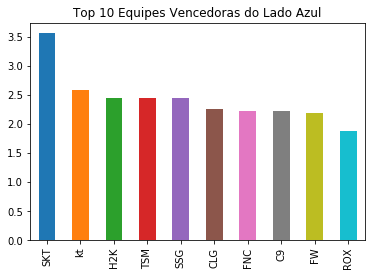

In [29]:
#GRÁFICO TOP 10 TIMES VENCEDORES BLUE TEAM
top10_blue.plot(kind='bar',legend=False)
plt.title("Top 10 Equipes Vencedoras do Lado Azul")

In [30]:
red_win = dados.redTeamTag[dados.rResult == 1].value_counts(True)*100
top10_red = red_win.head(10)

Text(0.5, 1.0, 'Top 10 Equipes Vencedoras do Lado Vermelho')

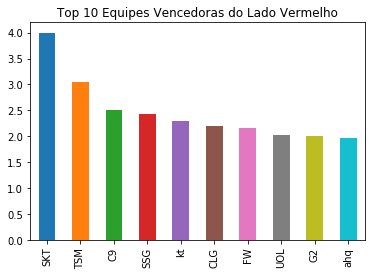

In [31]:
#GRÁFICO TOP 10 TIMES VENCEDORES RED TEAM
top10_red.plot(kind='bar',legend=False)
plt.title("Top 10 Equipes Vencedoras do Lado Vermelho")

Comparando os gráficos acima, podemos perceber que 7 dos top 10 campeões ocupam uma posição de destaque tanto no lado vermelho como no lado azul, isso demonstra que o lado em que o time joga afeta minimamente o desempenho da equipe.


In [33]:
blue_win = dados.redTeamTag[dados.rResult == 1].value_counts(True)*100
champ_red_win = dados.redTopChamp[dados.rResult == 1].value_counts(True)*100
top10_champ_red = champ_red_win.head(10)

Text(0.5, 1.0, 'Top 10 Champ Vencedores do Lado Vermelho')

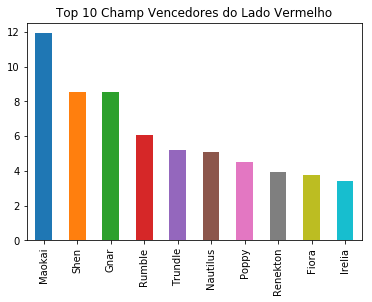

In [34]:
#GRÁFICO TOP 10 CHAMP DO TOP VENCEDORES RED TEAM
top10_champ_red.plot(kind='bar',legend=False)
plt.title("Top 10 Champ Vencedores do Lado Vermelho")

In [ ]:
champ_blue_win = dados.blueTopChamp[dados.bResult == 1].value_counts(True)*100
top10_champ_blue = champ_blue_win.head(10)

In [ ]:
#GRÁFICO TOP 10 CHAMP DO TOP VENCEDORES BLUE TEAM
top10_champ_blue.plot(kind='bar',legend=False)
plt.title("Top 10 Champ Vencedores do Lado Azul")

Isso se comprova analisando os Champs, sendo que 8 deles estão em ambas posições de destaque: do time azul e vermelho.

In [ ]:
top10_champ_red_df = pd.DataFrame(top10_champ_red)
top10_champ_blue_df = pd.DataFrame(top10_champ_blue)

In [ ]:
top10champs = top10_champ_red_df.join(top10_champ_blue_df,how="inner")

In [ ]:
#RELAÇAO ENTRE BLUE E RED SIDE PER CHAMP DO TOP
top10champs.plot(kind='bar', color=('red', 'blue'))
plt.ylabel('Frequência Relativa (em %)')
plt.title("Relação entre o Lado Azul e Vermelho por Champ do Top")

In [ ]:
jungle_champ_blue_win = dados.blueJungleChamp[dados.bResult == 1].value_counts(True)*100
jungle_champ_red_win = dados.redJungleChamp[dados.bResult == 1].value_counts(True)*100
top10_jungle_champ_blue = jungle_champ_blue_win.head(10)
top10_jungle_champ_red = jungle_champ_red_win.head(10)
top10_jungle_champ_blue_df = pd.DataFrame(top10_jungle_champ_blue)
top10_jungle_champ_red_df = pd.DataFrame(top10_jungle_champ_red)
top10junglechamps = top10_jungle_champ_red_df.join(top10_jungle_champ_blue_df,how="inner")
#RELAÇAO ENTRE BLUE E RED SIDE PER CHAMP DO JUNGLE
top10junglechamps.plot(kind='bar', color=('red', 'blue'))
plt.ylabel('Frequência Relativa (em %)')
plt.title("Relação entre o Lado Azul e Vermelho por Champ do Jungle")

In [ ]:
middle_champ_blue_win = dados.blueMiddleChamp[dados.bResult == 1].value_counts(True)*100
middle_champ_red_win = dados.redMiddleChamp[dados.bResult == 1].value_counts(True)*100
top10_middle_champ_blue = middle_champ_blue_win.head(10)
top10_middle_champ_red = middle_champ_red_win.head(10)
top10_middle_champ_blue_df = pd.DataFrame(top10_middle_champ_blue)
top10_middle_champ_red_df = pd.DataFrame(top10_middle_champ_red)
top10middlechamps = top10_middle_champ_red_df.join(top10_middle_champ_blue_df,how="inner")
#RELAÇAO ENTRE BLUE E RED SIDE PER CHAMP DO MIDDLE
top10junglechamps.plot(kind='bar', color=('red', 'blue'))
plt.ylabel('Frequência Relativa (em %)')
plt.title("Relação entre o Lado Azul e Vermelho por Champ do Middle")

In [ ]:
ADC_champ_blue_win = dados.blueADCChamp[dados.bResult == 1].value_counts(True)*100
ADC_champ_red_win = dados.redADCChamp[dados.bResult == 1].value_counts(True)*100
top10_ADC_champ_blue = ADC_champ_blue_win.head(10)
top10_ADC_champ_red = ADC_champ_red_win.head(10)
top10_ADC_champ_blue_df = pd.DataFrame(top10_ADC_champ_blue)
top10_ADC_champ_red_df = pd.DataFrame(top10_ADC_champ_red)
top10ADCchamps = top10_ADC_champ_red_df.join(top10_ADC_champ_blue_df,how="inner")
#RELAÇAO ENTRE BLUE E RED SIDE PER CHAMP DO ADC
top10ADCchamps.plot(kind='bar', color=('red', 'blue'))
plt.ylabel('Frequência Relativa (em %)')
plt.title("Relação entre o Lado Azul e Vermelho por Champ do ADC")

Acima vimos as relações entre os lados azul e vermelho para cada posições do Champ. A seguir nos aprofundaremos em técnicas de análise para melhor estudar nossos dados. 

## <font color='#00878A'>_Random Forrest_</font>

O Random Forest Classifier, é um classificador, que com varias *arvores de decisões*, que trabalham separadamente, geram uma predição. Se tal predição for predominante entre as demais arvores, o resultado do classificador será o mesmo.

- ####  Primeira iteração: dados concatenados

Nesta primeira iteração, o grupo juntou os dados dos adversários em um mesmo jogo, tais como os cinco champions e os nomes dos jogadores dos times e aa duas equipes adversárias, agrupando - os em uma coluna em comum, como mostrado no novo dataframe obtiddo e plotado abaixo.

In [ ]:
dados_testes.dropna(inplace=True)
columnsb=['bResult', 'blueTeamTag', 'blueTop', 'blueTopChamp', 'blueJungle','blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC','blueADCChamp', 'blueSupport', 'blueSupportChamp']
columnsr=['rResult', 'redTeamTag', 'redTop','redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle','redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport','redSupportChamp']
columns=['Result', 'TeamTag', 'Top','TopChamp', 'Jungle', 'JungleChamp', 'Middle','MiddleChamp', 'ADC', 'ADCChamp', 'Support','SupportChamp']


In [ ]:
dados_b = dados[columnsb]
dados_b.columns = columns
dados_r = dados[columnsr]
dados_r.columns = columns

In [ ]:
dados_concat = pd.concat([dados_b, dados_r]).dropna()
dados_concat.head(4)

In [ ]:
dados_bt = dados_testes[columnsb]
dados_bt.columns = columns
dados_rt = dados_testes[columnsr]
dados_rt.columns = columns

In [ ]:
teste_concat = pd.concat([dados_bt, dados_rt]).dropna()
teste_concat.head(4)

In [ ]:
y_train = dados_concat['Result']
x_train = dados_concat.drop(columns='Result')

In [ ]:
y_test = teste_concat['Result']
x_test = teste_concat.drop(columns='Result')

Convertendo as variáveis categóricas em qualitativas

In [ ]:
# utilizamos o OneHotEncoder para fazer essa conversão
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

Implementando o Modelo

In [ ]:
# cria modelo
model = RandomForestClassifier(random_state = 0)

# treina modelo
model.fit(x_train_encoded, y_train)

In [ ]:
model.score(x_train_encoded, y_train)

#### <font color='#00878A'>Testes</font>

Agora vamos testar a acurácia do modelo:

In [ ]:
x_test_encoded = encoder.transform(x_test)

In [ ]:
# Testa modelo
y_predict = model.predict(x_test_encoded)

In [ ]:
# Cálcula acurácia
acc = accuracy_score(y_test, y_predict)
print("Acurácia: {0}".format(acc))

### Considerando os dois times, separadamente em uma partida

- #### Segunda iteração: dados não concatenados

Separando Treinamento e Teste

In [ ]:
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

Convertendo as variáveis categóricas em quantitativas

In [ ]:
# utilizamos o OneHotEncoder para fazer essa conversão
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

Implementando o modelo

In [ ]:
#cria modelo
model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# treina modelo
model.fit(x_train_encoded, y_train)

#### <font color='#00878A'>Testes</font>


Agora vamos testar a acurácia do modelo:

In [ ]:
x_test_encoded = encoder.transform(x_test.astype(str).values)

In [ ]:
# Testa modelo
y_predict2 = model.predict(x_test_encoded)

In [ ]:
acc_RandomForestClassifier= model.score(x_test_encoded, y_test)

### Dados concatenados X dados não concatenados
##### Porque a análise com os dados não concatenados funcionou melhor que os dados não concatenados?

Como observado pelos resultados dos três classificadores acima, fica claro que a análise com os dados não concatenados possui uma acurácia maior do que a acurácia dos dados concatenados.

Isso ocorre, pois os dads não concatenados consideram os adversários, havendo as respectivas informações de cada time, ou seja,  de cada um dos lados, determinantes na acurácia, haja vista a interferência do time adversário e sua probabilidade de vitória, importantes para classificar o resultado do jogo. Portanto, comparar as probabilidades de vitória respectivas dos times azul e vermelho em uma partida torna-se fundamental para obter melhoria nos classificadores utilizados.

___

### Análise da probabilidade de acerto do classificador, segundo a segunda iteração

A seguir, o grupo criou um dataset contendo as probabilidades de vitórias que o classificador obteve do time azul. Assim, se a probabilidade de vitória for abaixo de 50%, o classificador dirá que o time perdeu e, se for maior que 50%, dirá que venceu. 

In [ ]:
dados_testes['bPredict'] = y_predict2

In [ ]:
y_predict_proba = model.predict_proba(x_test_encoded)

In [ ]:
y_predict_proba

In [ ]:
dados_testes['bPredictProba'] = y_predict_proba[:,1]

In [ ]:
dados_testes.sort_values(by='bPredictProba')[['blueTeamTag', 'redTeamTag', 'bPredictProba', 'bResult']].head(20)

In [ ]:
comp_erros = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

In [ ]:
comp_acertos['bPredictProba'].value_counts().head(10)

In [ ]:
comp_erros['blueTeamTag'].value_counts().head(10)

#### Grau de incerteza x Acurácia

A seguir, é plotado o gráfico do grau de incerteza (representado pela probabilidade de acerto) pela acurácia, cujo objetivo pauta-se em ajudar na decisão de pessoas, por exemplo, que desejam apostar em um determinado time (no caso, azul) em um determinado jogo. 
<p>
Como visto no classificador random forest na segunda iteração do grupo, a acurácia é de aproximadamente 65%. Neste comtexto, imagina-se, hipoteticamemte, uma pessoa que deseja apostar se o time azul vai ganhar ou perder. Para aumentar as probabilidades de tal pessoa acertar, assim, ela olhará a tabela contendo a probabilidade de vitória do time. Assim, por critério da pessoa, esta escolherá um determinado alpha: se a probabilidade de vitória do time estiver, por exemplo, entre 0 e 30%, pode-se apostar com maior segurança que o time perderá. Se estiver entre 70% e 100%, pode-se dizer com maior certeza que ganhará. Neste exemplo, o alpha escolhido é de 30%, mas ele pode ficar por critério da pessoa que estiver apostando.


In [ ]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(100 - np.array(alfa),acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Grau de certeza(%)')
plt.title('Acurácia por Grau de certeza')
plt.grid()
plt.show()

___

## <font color='#00878A'>_Logistic regression_</font>

A regressão logística é um método para analisar dados no qual existem uma ou mais variáveis independentes que determinam um resultado. O resultado é medido com uma variável binária.

#### <font color='#00878A'>Treinamento</font>

Como o grupo percebeu, a partir do primeiro classificador, que é melhor utilizar os dados não concatenados, tal estratégia foi adotada no logistic regression.

Separando Treinamento e Teste

In [ ]:
y_train2 = dados['bResult']
x_train2 = dados.drop(columns = ['bResult', 'rResult'])

Convertendo as variáveis categóricas em quantitativas

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train2_encoded = encoder.fit_transform(x_train2.astype(str).values)

Implementando o modelo: 

In [ ]:
# cria modelo
model2 = LogisticRegression(solver='lbfgs', multi_class='auto')

In [ ]:
# treina modelo
model2.fit(x_train2_encoded, y_train2)

In [ ]:
model2.score(x_train2_encoded,y_train2)

#### <font color='#00878A'>Testes</font>

In [ ]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')
dados_testes.dropna(inplace=True)

In [ ]:
y_test2 = dados_testes['bResult']
x_test2 = dados_testes.drop(columns=['bResult','rResult'])

In [ ]:
x_test2_encoded = encoder.transform(x_test2.astype(str).values)

In [ ]:
y_pred2 = model2.predict(x_test2_encoded)

In [ ]:
acc_LogisticRegression = accuracy_score(y_test2, y_pred2)

In [ ]:
y_pred2

Obtendo acurácia

In [ ]:
acc_LogisticRegression

___

### Acurácia x Grau de certeza

O grupo repetiu o processo para ajudar na decisão de aposta mostrado no caso do classificador Random Forest

In [ ]:
dados_testes['bPredict'] = y_pred2

In [ ]:
y_predict_proba2 = model2.predict_proba(x_test2_encoded)

In [ ]:
y_predict_proba2

In [ ]:
dados_testes['bPredictProba'] = y_predict_proba2[:,1]

In [ ]:
dados_testes.sort_values(by='bPredictProba')[['blueTeamTag', 'redTeamTag', 'bPredictProba', 'bResult']].head(20)

In [ ]:
comp_erros = dados_testes[dados_testes['bResult'] != dados_testes["bPredict"]]
comp_acertos = dados_testes[dados_testes['bResult'] == dados_testes["bPredict"]]

In [ ]:
import matplotlib.pyplot as plt
a=0
alfa=[]
alf=[]
acc=[]
while a<=50:
    alfa.append(a)
    a+=1
for a in alfa:    
    alf.append(a/100)
for a in alf:
    acertos=len(comp_acertos[comp_acertos.bPredictProba<a])+len(comp_acertos[comp_acertos.bPredictProba>=1-a])
    total=len(dados_testes[dados_testes.bPredictProba<a])+len(dados_testes[dados_testes.bPredictProba>=1-a])
    if total==0:
        total=1
    if acertos==0:
        acertos=1
    acc.append(acertos*100/total)
plt.plot(100 - np.array(alfa),acc)
plt.ylabel('Acurácia(%)')
plt.xlabel('Grau de certeza(%)')
plt.title('Acurácia por Grau de certeza')
plt.grid()
plt.show()


# <font color='#00878A'>_Decision tree_</font>

Vamos implementar agora uma técnica chamada Decision Tree. Ela é utilizada para classificadores e regressões, no nosso caso classificação. O objetivo do uso da Decision Tree é criar um modelo que fará uma predição baseado em uma classifição de várias classes.


### Separando treinamento e teste

Com a leitura da base de dados na célula abaixo, já podemos começar a construir o classificador Decision Tree e treiná-lo com o conjunto de treinamento.


In [ ]:

dados_testes = pd.read_excel('matchinfo-testes.xlsx')
dados_testes.dropna(inplace=True)
y_train = dados['bResult']
x_train = dados.drop(columns=['bResult', 'rResult'])
y_test = dados_testes['bResult']
x_test = dados_testes.drop(columns=['bResult', 'rResult'])

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')
x_train_encoded = encoder.fit_transform(x_train.astype(str).values)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(x_train_encoded, y_train)

In [ ]:
x_test_encoded3 = encoder.transform(x_test.astype(str).values)

In [ ]:
# Testa modelo
y_pred = regressor.predict(x_test_encoded3)

# Cálcula acurácia
acc_DecisionTreeRegressor = accuracy_score(y_test, y_pred)

print("Acurácia: {}".format(acc))

___

## <font color='#00878A'>_Classificador criado pelo grupo_</font>

Este classificador foi criado pelo grupo, cujo objetivo foi obter os resultados probabilísticos e compará-los aos obtidos com os classificadores passados em aula pelo professor.
<p>
A priori, foram definidos dados nos quais o classificador iria basear-se, sendo eles: win rate de cada jogador, win rate de cada Champion e, por fim, o win rate de cada time. Para calculá-los, foi usada a planilha contendo os resultados e os dados de cada partida. Desta forma, foram calculadas as probabilidades de cada time para ganhar o jogo, as quais foram comparadas. O time que tivesse, pois, maior probabilidade de vitória seria o vencedor.

In [ ]:
team={}
for i in dados.blueTeamTag:
    team[i]=0
for i in dados.redTeamTag:
    team[i]=0
for k,v in team.items():
    wins=len(dados[(dados.blueTeamTag==k) & (dados.bResult==1)])+len(dados[(dados.redTeamTag==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTeamTag==k])+ len(dados[dados.redTeamTag==k])
    if matchs!=0:
        team[k]=wins/matchs


In [ ]:
top = {}
for i in dados.blueTopChamp:
    top[i]=0
for i in dados.redTopChamp:
    top[i]=0
for k,v in  top.items():
    wins=len(dados[(dados.blueTopChamp==k) & (dados.bResult==1)])+len(dados[(dados.redTopChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTopChamp==k])+ len(dados[dados.redTopChamp==k])      
    if matchs!=0:
        top[k]=wins/matchs


In [ ]:
jg = {}
for i in dados.blueJungleChamp:
    jg[i]=0
for i in dados.redJungleChamp:
    jg[i]=0
for k,v in  jg.items():
    wins=len(dados[(dados.blueJungleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redJungleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungleChamp==k])+ len(dados[dados.redJungleChamp==k])      
    if matchs!=0:
        jg[k]=wins/matchs


In [ ]:
mid = {}
for i in dados.blueMiddleChamp:
    mid[i]=0
for i in dados.redMiddleChamp:
    mid[i]=0
for k,v in  mid.items():
    wins=len(dados[(dados.blueMiddleChamp==k) & (dados.bResult==1)])+len(dados[(dados.redMiddleChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddleChamp==k])+ len(dados[dados.redMiddleChamp==k])      
    if matchs!=0:
        mid[k]=wins/matchs


In [ ]:
adc = {}
for i in dados.blueADCChamp:
    adc[i]=0
for i in dados.redADCChamp:
    adc[i]=0
for k,v in  adc.items():
    wins=len(dados[(dados.blueADCChamp==k) & (dados.bResult==1)])+len(dados[(dados.redADCChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADCChamp==k])+ len(dados[dados.redADCChamp==k])      
    if matchs!=0:
        adc[k]=wins/matchs


In [ ]:
sup = {}
for i in dados.blueSupportChamp:
    sup[i]=0
for i in dados.redSupportChamp:
    sup[i]=0
for k,v in  sup.items():
    wins=len(dados[(dados.blueSupportChamp==k) & (dados.bResult==1)])+len(dados[(dados.redSupportChamp==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupportChamp==k])+ len(dados[dados.redSupportChamp==k])      
    if matchs!=0:
        sup[k]=wins/matchs


In [ ]:
top_player = {}
for i in dados.blueTop:
    top_player[i]=0
for i in dados.redTop:
    top_player[i]=0
for k,v in  top_player.items():
    wins=len(dados[(dados.blueTop==k) & (dados.bResult==1)])+len(dados[(dados.redTop==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueTop==k])+ len(dados[dados.redTop==k])      
    if matchs!=0:
        top_player[k]=wins/matchs


In [ ]:
jg_player = {}
for i in dados.blueJungle:
    jg_player[i]=0
for i in dados.redJungle:
    jg_player[i]=0
for k,v in  jg_player.items():
    wins=len(dados[(dados.blueJungle==k) & (dados.bResult==1)])+len(dados[(dados.redJungle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueJungle==k])+ len(dados[dados.redJungle==k])      
    if matchs!=0:
        jg_player[k]=wins/matchs


In [ ]:
mid_player = {}
for i in dados.blueMiddle:
    mid_player[i]=0
for i in dados.redMiddle:
    mid_player[i]=0
for k,v in  mid_player.items():
    wins=len(dados[(dados.blueMiddle==k) & (dados.bResult==1)])+len(dados[(dados.redMiddle==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueMiddle==k])+ len(dados[dados.redMiddle==k])      
    if matchs!=0:
        mid_player[k]=wins/matchs


In [ ]:
adc_player = {}
for i in dados.blueADC:
    adc_player[i]=0
for i in dados.redADC:
    adc_player[i]=0
for k,v in  adc_player.items():
    wins=len(dados[(dados.blueADC==k) & (dados.bResult==1)])+len(dados[(dados.redADC==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueADC==k])+ len(dados[dados.redADC==k])      
    if matchs!=0:
        adc_player[k]=wins/matchs


In [ ]:
sup_player = {}
for i in dados.blueSupport:
    sup_player[i]=0
for i in dados.redSupport:
    sup_player[i]=0
for k,v in  sup_player.items():
    wins=len(dados[(dados.blueSupport==k) & (dados.bResult==1)])+len(dados[(dados.redSupport==k) & (dados.rResult==1)])
    matchs=len(dados[dados.blueSupport==k])+ len(dados[dados.redSupport==k])      
    if matchs!=0:
        sup_player[k]=wins/matchs


In [ ]:
#dicionarios juntos
alls={}

for k,v in team.items():
    alls[k]=v

for k,v in top.items():
    alls[k]=v

for k,v in mid.items():
    if k not in mid.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid[k])/2

for k,v in jg.items():
    if k not in jg.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg[k])/2

for k,v in adc.items():
    if k not in adc.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc[k])/2

for k,v in sup.items():
    if k not in sup.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup[k])/2

for k,v in top_player.items():
    if k not in top_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+top_player[k])/2

for k,v in jg_player.items():
    if k not in jg_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+jg_player[k])/2

for k,v in mid_player.items():
    if k not in mid_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+mid_player[k])/2

for k,v in adc_player.items():
    if k not in adc_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+adc_player[k])/2

for k,v in sup_player.items():
    if k not in sup_player.keys():
        alls[k]=v
    else:
        alls[k]=(v+sup_player[k])/2
    

In [ ]:
dados_testes = pd.read_excel('matchinfo-testes.xlsx')

In [ ]:
wins=[]
for i in range(len(dados_testes)):
    probblue=1
    probred=1
    
    for f in columnsb:
        if dados_testes.loc[i,f] not in alls.keys():
            probblue*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probblue*=0.5
            else:
                probblue*=alls[dados_testes.loc[i,f]]
    for f in columnsr:
        if dados_testes.loc[i,f] not in alls.keys():
            probred*=0.5
        else:
            if alls[dados_testes.loc[i,f]]==0 or alls[dados_testes.loc[i,f]]==1:
                probred*=0.5
            else:
                probred*=alls[dados_testes.loc[i,f]]
    if probblue<probred:
        wins.append(0)
    else:
        wins.append(1)

In [ ]:
#teste de qualidade
certo=0
total=0
for i in range(len(dados_testes)):
    if dados_testes.loc[i,'bResult']==wins[i]:
        certo+=1
        total+=1
    else:
        total+=1        

In [ ]:
print("Acurácia: {}".format(certo/total))

## <font color='#00878A'>Classificador para o usuário</font>

### Criando um dataframe para ser lido


O grupo criou um código com intuito de ajudar uma pessoa no chute em relação à uma vitória ou derrota. Neste caso, havendo os inputs, o usuário escreve uma determinada composição com os champions, escolha dos players e seu respectivo time. Assim, obtendo os dados, é possível que os classificadores analizem-os e retorne o time vencedor e o perdedor.

In [ ]:
clas=['League', 'Year', 'Season', 'Type', 'blueTeamTag', 
       'redTeamTag', 'gamelength', 'blueTop', 'blueTopChamp', 'blueJungle',
       'blueJungleChamp', 'blueMiddle', 'blueMiddleChamp', 'blueADC',
       'blueADCChamp', 'blueSupport', 'blueSupportChamp', 'redTop',
       'redTopChamp', 'redJungle', 'redJungleChamp', 'redMiddle',
       'redMiddleChamp', 'redADC', 'redADCChamp', 'redSupport',
       'redSupportChamp', 'Address']
print('Se voce quiser pode tentar classificar os seus dados')
data=[]
for i in clas:
    a=input('{0} ? '.format(i))
    data.append(a)
df2 = pd.DataFrame(np.array([data]),columns=clas)
df2



### Analisando o Dataframe nos Classificadores

In [ ]:
df2_encoded = encoder.transform(df2.astype(str).values)
ypredict = model.predict(df2_encoded)
ypredict2 = model2.predict(df2_encoded)
ypredict3 = regressor.predict(df2_encoded)



print('Random Forest Classifier:')
if ypredict==1:
    print('Time Azul Ganhou!!!')
else:
    print('Time Vermelho Ganhou!!!')
print('Logistic Regression:')
if ypredict2==1:
    print('Time Azul Ganhou!!!')
else:
    print('Time Vermelho Ganhou!!!')
print('Decision Tree Regressor')
if ypredict3==1:
    print('Time Azul Ganhou!!!')
else:
    print('Time Vermelho Ganhou!!!')    

## Conclusão


<p>
    A partir da base de dados e dos classificadores feitos pelo grupo, conclui-se que o melhor classificador usado para a realização da predição de qual dos times em uma determimnada partida irá ganhar ou perder, com uma determinada composição de champions e um determinado time, é o random forest. 
<p>
    Como justificativa, temos que o random forest analiza um conjunto de árvores, ou seja, pode-se defini-lo como uma conjunto de "decisions tree", na qual se agregam maiores informações em relação às probabilidades.
<p>
    A acurácia de aproximadamente 65% é dada pelo fato de que o jogo League of Legends pode possuir muitas intervenções e variedades em seus resultados. Ademais, o grupo não considerou de forma adequada os matchups possíveis, ou seja, as combinações de campeões entre os times oponentes, pois pela grande quantidade que campeoes haviam poucos dados para analisar todos, tendo em vista, ainda que atualmente o jogo possui um total de 147 campeões.


In [ ]:
print('Decision Tree:',acc_DecisionTreeRegressor)
print('Logistic Regression:',acc_LogisticRegression)
print('Random Forest Classifier:',acc_RandomForestClassifier)